In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as patches

from matplotlib import rcParams, gridspec
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import Patch
from matplotlib.ticker import AutoMinorLocator
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle



In [2]:
# Define a function to format numbers in scientific notation
def comma_formatter(x, pos):
    # Apply commas only for values 10,000 and above
    if abs(x) >= 10000:
        return f"{x:,.0f}"  # Format with commas
    return f"{x:.0f}"  # No commas for values less than 10,000

### Figure 1 (a) Pier 1 profile visualization and adopted geotechnical parameters

C:\Users\AMH-L143\AppData\Local\Temp\ipykernel_27156\1829641776.py:262: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.2)


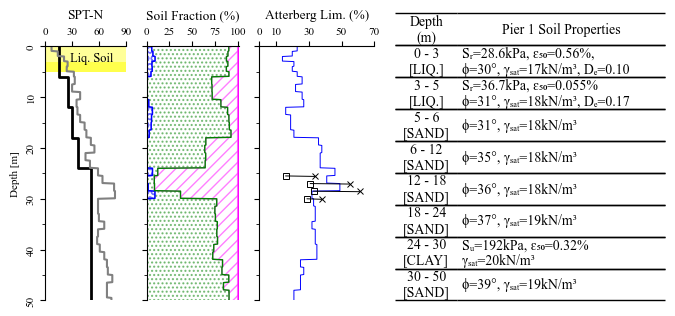

In [3]:
# Set the font globally to Times New Roman
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 8

# Get the current working directory
cwd = os.getcwd()

# Define the data manually or load from a CSV file
idealSPT = {
    "Depth [m]": [0, 6, 6, 12, 12, 18, 18, 24, 24, 30, 30, 60],
    "Ideal. N60": [15, 15, 25, 25, 30, 30, 37, 37, 51, 51, 51, 51],
}

# File paths
file_paths = {
    "pier1_sp": "data-figures/pier1-soilprofile.txt",
}

# Create DataFrames
df_SPT = pd.DataFrame(idealSPT)
df_sp_pier1 = pd.read_csv(os.path.join(cwd, file_paths["pier1_sp"]), header=0)

fig = plt.figure(figsize=(8, 3.3))
outer_gs = gridspec.GridSpec(1, 4, width_ratios=[0.7, 0.8, 1, 2.35], wspace=0.15)

# First 4 plots
axs = [fig.add_subplot(outer_gs[0, i]) for i in range(4)]

# # Create subplots for multiple plots
# fig, axs = plt.subplots(1, 4, figsize=(6.6, 4), sharey=True)  # 1 row, 3 columns, shared y-axis

# Plot on axs[0]
axs[0].plot(df_SPT["Ideal. N60"], df_SPT["Depth [m]"], linestyle="-", color="Black", lw=2, label="Ideal.\nN₆₀")
axs[0].plot(df_sp_pier1["SPT-N"], df_sp_pier1["Depth"], linestyle="-", color="Gray", label="Field\nN")
axs[0].set_title("SPT-N")
axs[0].set_ylabel("Depth [m]")
axs[0].grid(True)
# axs[0].legend(loc="lower left",
#             labelspacing=0.1,
#             borderpad=0.15,
#             frameon=True,
#             handlelength=1.5,
#             handletextpad=0.4,
#             borderaxespad=0.2
# )
axs[0].set_ylim(0, 50)
axs[0].grid(False)  # Disable all gridlines

# Move x-axis ticks and tick marks to the top
axs[0].tick_params(
    axis='x',          # Apply changes to the x-axis
    top=True,          # Enable ticks on the top
    labeltop=True,     # Show tick labels at the top
    bottom=False,      # Disable ticks on the bottom
    labelbottom=False  # Hide tick labels at the bottom
)
axs[0].set_xlim(0, 90)
axs[0].spines['bottom'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].set_xticks([0, 30, 60, 90])

rect_liqsand1 = patches.Rectangle(
    xy=(0, 0),                 
    width=100, 
    height=3,               
    facecolor='yellow',          
    alpha=0.4,                 
    linewidth=1  
)                  
axs[0].add_patch(rect_liqsand1)

rect_liqsand2 = patches.Rectangle(
    xy=(0,3),                  
    width=100, 
    height=2,               
    facecolor='yellow',          
    alpha=0.7, 
    linewidth=1                           
)
axs[0].add_patch(rect_liqsand2)
axs[0].text(28, 3, "Liq. Soil", fontsize=9, color="black")
axs[0].tick_params(axis='y', labelrotation=90)  # Rotate x-axis labels vertically
for label in axs[0].get_yticklabels():
    label.set_verticalalignment('center')

axs[0].tick_params(axis='y', which='minor')
axs[0].yaxis.set_minor_locator(AutoMinorLocator(2))  # 5 minor ticks per major tick

axs[0].invert_yaxis()  # Invert y-axis so depth increases downwards

# Plot on axs[1] (example placeholder)
axs[1].plot(df_sp_pier1["%Gravel"], df_sp_pier1["Depth"], linestyle="-", color="Blue", label="%Gravel", linewidth=1.0 )
axs[1].plot(df_sp_pier1["%Sand"], df_sp_pier1["Depth"], linestyle="-", color="Green", label="%Sand", linewidth=1.0 )
axs[1].set_title("Soil Fraction (%)")
axs[1].grid(True)
# axs[1].legend()
axs[1].set_xlim(0, 101)
axs[1].set_ylim(0, 50)
axs[1].grid(False)  # Disable all gridlines

axs[1].fill_betweenx(
    df_sp_pier1["Depth"],                 # y-coordinates (Depth)
    0,                                    # x1 (left boundary)
    df_sp_pier1["%Gravel"],               # x2 (right boundary)
    facecolor="none",                # Fill color
    edgecolor="blue",                    # Border color (optional)
    hatch="OO",                          # Hatch pattern
    alpha=0.5                             # Transparency for the fill
)

axs[1].fill_betweenx(
    df_sp_pier1["Depth"],                 # y-coordinates (Depth)
    df_sp_pier1["%Gravel"],               # x1 (left boundary)
    df_sp_pier1["%Sand"],                 # x2 (right boundary)
    facecolor="none",                     # No fill color
    edgecolor="green",                     # Hatch color
    hatch="....",                          # Hatch pattern
    linewidth=0,                           # Remove border around the filled region
    alpha=0.5,
)

axs[1].fill_betweenx(
    df_sp_pier1["Depth"],                 # y-coordinates (Depth)
    df_sp_pier1["%Sand"],                                    # x1 (left boundary)
    100,               # x2 (right boundary)
    facecolor="none",                # Fill color
    edgecolor="magenta",                    # Border color (optional)
    hatch="///",                          # Hatch pattern
    alpha=0.5,                             # Transparency for the fill
    linewidth=1 
)

axs[1].vlines(
    x=100,                      # y-coordinate of the horizontal line
    ymin=0,                   # Start x-coordinate
    ymax=60,                   # End x-coordinate
    colors="Magenta",              # Line color
    linestyles="-",            # Line style (e.g., dotted line)
    linewidth=1              # Line width
)

# Define custom legend entries
custom_legend = [
    Patch(facecolor="none", edgecolor="blue", hatch="OO", linewidth=0.5, label="% Gravel"),
    Patch(facecolor="none", edgecolor="green", hatch="....", linewidth=0.5, label="% Sand"),
    Patch(facecolor="none", edgecolor="magenta", hatch="///", linewidth=0.5, label="% Fines"),
]

# Add the custom legend
# axs[1].legend(handles=custom_legend, 
#             loc="lower left",
#             labelspacing=0.1,
#             borderpad=0.15,
#             frameon=True,
#             handlelength=1,
#             handletextpad=0.3,
#             borderaxespad=0.2)

# Move x-axis ticks and tick marks to the top
axs[1].tick_params(
    axis='x',          # Apply changes to the x-axis
    top=True,          # Enable ticks on the top
    labeltop=True,     # Show tick labels at the top
    bottom=False,      # Disable ticks on the bottom
    labelbottom=False  # Hide tick labels at the bottom
)

axs[1].spines['bottom'].set_visible(False)
axs[1].spines['right'].set_visible(False)

axs[1].set_xticks([0, 25, 50, 75, 100])
axs[1].set_yticklabels([])               # Remove y-axis tick label

axs[1].tick_params(axis='y', which='minor')
axs[1].yaxis.set_minor_locator(AutoMinorLocator(2))  # 5 minor ticks per major tick

axs[1].invert_yaxis()

axs[2].plot(df_sp_pier1["MC"], df_sp_pier1["Depth"], linestyle='-', lw=0.7, color='blue', label="M.C.")
axs[2].plot(df_sp_pier1["LL-PL"], df_sp_pier1["Depth"], linestyle='-', lw=0.7, color='black', label="P.I.")
axs[2].plot(df_sp_pier1["PL"], df_sp_pier1["Depth"], marker="s", linestyle='None', ms=4, mew=0.7, mfc="none", color='black', label="P.L.")
axs[2].plot(df_sp_pier1["LL"], df_sp_pier1["Depth"], marker="x", linestyle='None', ms=4, mew=0.7, color='black', label="L.L.")
axs[2].set_title("Atterberg Lim. (%)")

axs[2].set_xlim(0, 70)
axs[2].set_ylim(0, 50)

# Add the custom legend
# axs[2].legend(loc="lower right",
#             labelspacing=0.1,
#             borderpad=0.15,
#             frameon=False,
#             handlelength=1.5,
#             handletextpad=0.4,
#             borderaxespad=0.1)    
     
axs[2].set_xticks([0, 10, 30, 50, 70])
axs[2].set_yticklabels([])               # Remove y-axis tick label

axs[2].tick_params(
    axis='x',          # Apply changes to the x-axis
    top=True,          # Enable ticks on the top
    labeltop=True,     # Show tick labels at the top
    bottom=False,      # Disable ticks on the bottom
    labelbottom=False  # Hide tick labels at the bottom
)

axs[2].spines['bottom'].set_visible(False)
axs[2].spines['right'].set_visible(False)

axs[2].invert_yaxis()


soil_data = {
    "Depth\n(m)": ["0 - 3\n[LIQ.]", "3 - 5\n[LIQ.]", "5 - 6\n[SAND]", "6 - 12\n[SAND]", "12 - 18\n[SAND]", "18 - 24\n[SAND]", "24 - 30\n[CLAY]", "30 - 50\n[SAND]"],
    "Pier 1 Soil Properties": ["Sᵣ=28.6kPa, ɛ₅₀=0.56%,\nϕ=30°, γₛₐₜ=17kN/m³, Dₑ=0.10",
                        "Sᵣ=36.7kPa, ɛ₅₀=0.055%\nϕ=31°, γₛₐₜ=18kN/m³, Dₑ=0.17",
                        "ϕ=31°, γₛₐₜ=18kN/m³",
                        "ϕ=35°, γₛₐₜ=18kN/m³",
                        "ϕ=36°, γₛₐₜ=18kN/m³",
                        "ϕ=37°, γₛₐₜ=19kN/m³",
                        "Sᵤ=192kPa, ɛ₅₀=0.32%\nγₛₐₜ=20kN/m³",
                        "ϕ=39°, γₛₐₜ=19kN/m³"]
}
df_soil = pd.DataFrame(soil_data)

axs[2].tick_params(axis='y', which='minor')
axs[2].yaxis.set_minor_locator(AutoMinorLocator(2))  # 5 minor ticks per major tick

axs[3].axis("off")  # Turn off the axis for the table
table = axs[3].table(
    cellText=df_soil.values,         # Table data
    colLabels=df_soil.columns,       # Column headers
    loc="center",               # Position the table at the center
    cellLoc="left",           # Align cell text to the center
    bbox=[0, 0, 1, 1.13],  # Adjust position [x, y, width, height]
)

# table.scale(1, 1)  # Scale column width by 1x, row height by 2x

# Adjust table appearance
table.auto_set_font_size(False)
table.set_fontsize(10)
# table.auto_set_column_width(col=list(range(len(df.columns))))  # Auto adjust column widths

# Adjust the width of a specific column (e.g., the second column, "SPT-N")
for (row, col), cell in table.get_celld().items():
    if col == 0:  # Index for the second column
        cell.set_width(0.23)  # Set a custom width for the column
        cell.get_text().set_horizontalalignment("center")  # Horizontal alignment
        cell.visible_edges = "horizontal"
    if col == 1:  # Index for the second column
        cell.set_width(0.77)  # Set a custom width for the column
        cell.visible_edges = "horizontal"
    # if col == 2:  # Index for the second column
    #     cell.set_width(0.06)  # Set a custom width for the column

for (row, col), cell in table.get_celld().items():
    cell.PAD = 0.02  # Set custom padding (default is 0.2)

# Adjust layout and show the plots
plt.tight_layout(pad=0.2)
plt.show()

# fig.savefig("pier1-soilProfile.svg", format="svg", bbox_inches="tight")
fig.savefig("figures/fig1a.svg", format="svg", bbox_inches="tight")
fig.savefig("figures/fig1a.svg.pdf", format="pdf", bbox_inches="tight")
fig.savefig("figures/fig1a.svg.png", format="png", bbox_inches="tight", dpi=1000)


### Figure 1 (b) Pier 3 profile visualization and adopted geotechnical parameters

C:\Users\AMH-L143\AppData\Local\Temp\ipykernel_27156\1358154108.py:272: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.2)


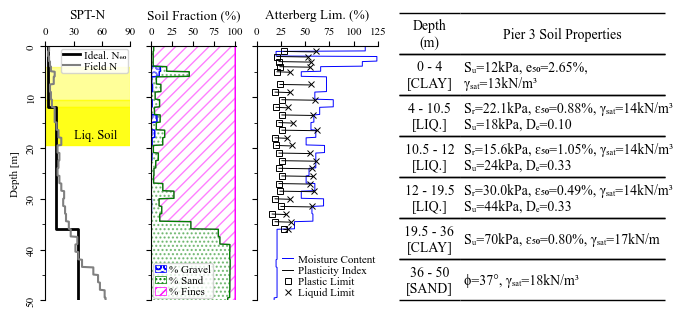

In [4]:
# Set the font globally to Times New Roman
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 8

# Get the current working directory
cwd = os.getcwd()

# Define the data manually or load from a CSV file
idealSPT = {
    "Depth [m]": [0,12,12,36,36,52.5,52.5,60],
    "Ideal. N60": [3,3,11,11,35,35,58,58],
}

# File paths
file_paths = {
    "pier3_sp": "data-figures/pier3-soilprofile.txt",
}

# Create DataFrames
df_SPT = pd.DataFrame(idealSPT)
df_sp_pier3 = pd.read_csv(os.path.join(cwd, file_paths["pier3_sp"]), header=0)

fig = plt.figure(figsize=(8, 3.3))
outer_gs = gridspec.GridSpec(1, 4, width_ratios=[0.7, 0.7, 1, 2.2], wspace=0.15)

# First 4 plots
axs = [fig.add_subplot(outer_gs[0, i]) for i in range(4)]

# # Create subplots for multiple plots
# fig, axs = plt.subplots(1, 4, figsize=(6.6, 4), sharey=True)  # 1 row, 3 columns, shared y-axis

# Plot on axs[0]
axs[0].plot(df_SPT["Ideal. N60"], df_SPT["Depth [m]"], linestyle="-", color="Black", lw=2, label="Ideal. N₆₀")
axs[0].plot(df_sp_pier3["SPT-N"], df_sp_pier3["Depth"], linestyle="-", color="Gray", label="Field N")
axs[0].set_title("SPT-N")
axs[0].set_ylabel("Depth [m]")
axs[0].grid(True)
axs[0].legend(loc="upper right",
            labelspacing=0.1,
            borderpad=0.15,
            frameon=True,
            handlelength=1.5,
            handletextpad=0.4,
            borderaxespad=0.2
)
axs[0].set_ylim(0, 50)
axs[0].grid(False)  # Disable all gridlines

# Move x-axis ticks and tick marks to the top
axs[0].tick_params(
    axis='x',          # Apply changes to the x-axis
    top=True,          # Enable ticks on the top
    labeltop=True,     # Show tick labels at the top
    bottom=False,      # Disable ticks on the bottom
    labelbottom=False  # Hide tick labels at the bottom
)
axs[0].set_xlim(0, 90)
axs[0].spines['bottom'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].set_xticks([0, 30, 60, 90])

rect_liqclay1 = patches.Rectangle(
    xy=(-10, 4),                  
    width=axs[0].get_xlim()[1]+10, 
    height=6.5,               
    color='yellow',          
    alpha=0.4,               
    zorder=0                    
)
axs[0].add_patch(rect_liqclay1)

rect_liqclay2 = patches.Rectangle(
    xy=(-10, 10.5),                  
    width=axs[0].get_xlim()[1]+10, 
    height=1.5,               
    color='yellow',          
    alpha=0.7,               
    zorder=0                    
)
axs[0].add_patch(rect_liqclay2)

rect_liqclay3 = patches.Rectangle(
    xy=(-10, 12),                  
    width=axs[0].get_xlim()[1]+10, 
    height=7.5,               
    color='yellow',          
    alpha=0.9,               
    zorder=0                    
)
axs[0].add_patch(rect_liqclay3)
axs[0].text(30, 18, "Liq. Soil", fontsize=9, color="black")
axs[0].tick_params(axis='y', labelrotation=90)  # Rotate x-axis labels vertically
for label in axs[0].get_yticklabels():
    label.set_verticalalignment('center')

axs[0].tick_params(axis='y', which='minor')
axs[0].yaxis.set_minor_locator(AutoMinorLocator(2))  # 5 minor ticks per major tick

axs[0].invert_yaxis()  # Invert y-axis so depth increases downwards


# Plot on axs[1] (example placeholder)
axs[1].plot(df_sp_pier3["%Gravel"], df_sp_pier3["Depth"], linestyle="-", color="Blue", label="%Gravel", linewidth=1.0 )
axs[1].plot(df_sp_pier3["%Sand"], df_sp_pier3["Depth"], linestyle="-", color="Green", label="%Sand", linewidth=1.0 )
axs[1].set_title("Soil Fraction (%)")
axs[1].grid(True)
axs[1].legend()
axs[1].set_xlim(0, 101)
axs[1].set_ylim(0, 50)
axs[1].grid(False)  # Disable all gridlines

axs[1].fill_betweenx(
    df_sp_pier3["Depth"],                 # y-coordinates (Depth)
    0,                                    # x1 (left boundary)
    df_sp_pier3["%Gravel"],               # x2 (right boundary)
    facecolor="none",                # Fill color
    edgecolor="blue",                    # Border color (optional)
    hatch="OO",                          # Hatch pattern
    alpha=0.5                            # Transparency for the fill
)

axs[1].fill_betweenx(
    df_sp_pier3["Depth"],                 # y-coordinates (Depth)
    df_sp_pier3["%Gravel"],               # x1 (left boundary)
    df_sp_pier3["%Sand"],                 # x2 (right boundary)
    facecolor="none",                     # No fill color
    edgecolor="green",                     # Hatch color
    hatch="....",                          # Hatch pattern
    linewidth=0,                           # Remove border around the filled region
    alpha=0.5
)

axs[1].fill_betweenx(
    df_sp_pier3["Depth"],                 # y-coordinates (Depth)
    df_sp_pier3["%Sand"],                                    # x1 (left boundary)
    100,               # x2 (right boundary)
    facecolor="none",                # Fill color
    edgecolor="magenta",                    # Border color (optional)
    hatch="///",                          # Hatch pattern
    alpha=0.5,                             # Transparency for the fill
    linewidth=1 
)

axs[1].vlines(
    x=100,                      # y-coordinate of the horizontal line
    ymin=0,                   # Start x-coordinate
    ymax=60,                   # End x-coordinate
    colors="Magenta",              # Line color
    linestyles="-",            # Line style (e.g., dotted line)
    linewidth=1              # Line width
)

# Define custom legend entries
custom_legend = [
    Patch(facecolor="none", edgecolor="blue", hatch="OO", linewidth=0.5, label="% Gravel"),
    Patch(facecolor="none", edgecolor="green", hatch="....", linewidth=0.5, label="% Sand"),
    Patch(facecolor="none", edgecolor="magenta", hatch="///", linewidth=0.5, label="% Fines"),
]

# Add the custom legend
axs[1].legend(handles=custom_legend, 
            loc="lower left",
            labelspacing=0.1,
            borderpad=0.15,
            frameon=True,
            handlelength=1,
            handletextpad=0.3,
            borderaxespad=0.2)

# Move x-axis ticks and tick marks to the top
axs[1].tick_params(
    axis='x',          # Apply changes to the x-axis
    top=True,          # Enable ticks on the top
    labeltop=True,     # Show tick labels at the top
    bottom=False,      # Disable ticks on the bottom
    labelbottom=False  # Hide tick labels at the bottom
)

axs[1].spines['bottom'].set_visible(False)
axs[1].spines['right'].set_visible(False)

axs[1].set_xticks([0, 25, 50, 75, 100])
axs[1].set_yticklabels([])               # Remove y-axis tick label

axs[1].tick_params(axis='y', which='minor')
axs[1].yaxis.set_minor_locator(AutoMinorLocator(2))  # 5 minor ticks per major tick

axs[1].invert_yaxis()

axs[2].plot(df_sp_pier3["MC"], df_sp_pier3["Depth"], linestyle='-', lw=0.7, color='blue', label="Moisture Content")
axs[2].plot(df_sp_pier3["LL-PL"], df_sp_pier3["Depth"], linestyle='-', lw=0.7, color='black', label="Plasticity Index")
axs[2].plot(df_sp_pier3["PL"], df_sp_pier3["Depth"], marker="s", linestyle='None', ms=4, mew=0.7, mfc="none", color='black', label="Plastic Limit")
axs[2].plot(df_sp_pier3["LL"], df_sp_pier3["Depth"], marker="x", linestyle='None', ms=4, mew=0.7, color='black', label="Liquid Limit")
axs[2].set_title("Atterberg Lim. (%)")

axs[2].set_xlim(0, 125)
axs[2].set_ylim(0, 50)

# Add the custom legend
axs[2].legend(loc="lower right",
            labelspacing=0.1,
            borderpad=0.15,
            frameon=False,
            handlelength=1,
            handletextpad=0.4,
            borderaxespad=0.1)    
     
axs[2].set_xticks([0, 25, 50, 75, 100, 125])
axs[2].set_yticklabels([])               # Remove y-axis tick label

axs[2].tick_params(
    axis='x',          # Apply changes to the x-axis
    top=True,          # Enable ticks on the top
    labeltop=True,     # Show tick labels at the top
    bottom=False,      # Disable ticks on the bottom
    labelbottom=False  # Hide tick labels at the bottom
)

axs[2].spines['bottom'].set_visible(False)
axs[2].spines['right'].set_visible(False)

axs[2].invert_yaxis()


soil_data = {
    "Depth\n(m)": ["0 - 4\n[CLAY]", "4 - 10.5\n[LIQ.]", "10.5 - 12\n[LIQ.]", "12 - 19.5\n[LIQ.]", "19.5 - 36\n[CLAY]", "36 - 50\n[SAND]"], #, "52.5 - 60\n[SAND]"],
    "Pier 3 Soil Properties": ["Sᵤ=12kPa, e₅₀=2.65%,\nγₛₐₜ=13kN/m³",
                        "Sᵣ=22.1kPa, ɛ₅₀=0.88%, γₛₐₜ=14kN/m³\nSᵤ=18kPa, Dₑ=0.10",
                        "Sᵣ=15.6kPa, ɛ₅₀=1.05%, γₛₐₜ=14kN/m³\nSᵤ=24kPa, Dₑ=0.33",
                        "Sᵣ=30.0kPa, ɛ₅₀=0.49%, γₛₐₜ=14kN/m³\nSᵤ=44kPa, Dₑ=0.33",
                        "Sᵤ=70kPa, ɛ₅₀=0.80%, γₛₐₜ=17kN/m",
                        "ϕ=37°, γₛₐₜ=18kN/m³"]#,
                        #"ϕ=40°, γₛₐₜ=20kN/m³"]
}
df_soil = pd.DataFrame(soil_data)

axs[2].tick_params(axis='y', which='minor')
axs[2].yaxis.set_minor_locator(AutoMinorLocator(2))  # 5 minor ticks per major tick

axs[3].axis("off")  # Turn off the axis for the table
table = axs[3].table(
    cellText=df_soil.values,         # Table data
    colLabels=df_soil.columns,       # Column headers
    loc="center",               # Position the table at the center
    cellLoc="left",           # Align cell text to the center
    bbox=[0, 0, 1, 1.13],  # Adjust position [x, y, width, height]
)

# table.scale(1, 1)  # Scale column width by 1x, row height by 2x

# Adjust table appearance
table.auto_set_font_size(False)
table.set_fontsize(10)
# table.auto_set_column_width(col=list(range(len(df.columns))))  # Auto adjust column widths

# Adjust the width of a specific column (e.g., the second column, "SPT-N")
for (row, col), cell in table.get_celld().items():
    if col == 0:  # Index for the second column
        cell.set_width(0.23)  # Set a custom width for the column
        cell.get_text().set_horizontalalignment("center")  # Horizontal alignment
        cell.visible_edges = "horizontal"
    if col == 1:  # Index for the second column
        cell.set_width(0.77)  # Set a custom width for the column
        cell.visible_edges = "horizontal"
    # if col == 2:  # Index for the second column
    #     cell.set_width(0.06)  # Set a custom width for the column

for (row, col), cell in table.get_celld().items():
    cell.PAD = 0.02  # Set custom padding (default is 0.2)

# Adjust layout and show the plots
plt.tight_layout(pad=0.2)
plt.show()

fig.savefig("figures/fig1b.svg", format="svg", bbox_inches="tight")
fig.savefig("figures/fig1b.pdf", format="pdf", bbox_inches="tight")
fig.savefig("figures/fig1b.png", format="png", bbox_inches="tight", dpi=1000)


### Figure 2 Pier 1 and Pier 3 capacity and axial resistance profiles

C:\Users\AMH-L143\AppData\Local\Temp\ipykernel_27156\1822010306.py:481: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


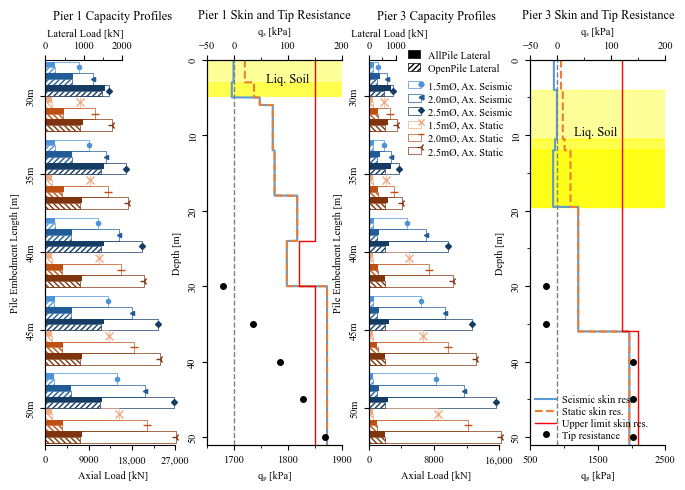

In [8]:
# Set the font globally to Times New Roman
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 7.5

# Get the current working directory
cwd = os.getcwd()

# File paths
file_paths = {
    "pier1_eqloads": "data-figures/pier1-seismic-loads.txt",
    "pier1_stloads": "data-figures/pier1-static-loads.txt",
    "pier3_eqloads": "data-figures/pier3-seismic-loads.txt",
    "pier3_stloads": "data-figures/pier3-static-loads.txt",
    "skin_friction": "data-figures/skin-friction.txt"
}

# Create DataFrames
df_eq_pier1 = pd.read_csv(os.path.join(cwd, file_paths["pier1_eqloads"]), header=0)
df_st_pier1 = pd.read_csv(os.path.join(cwd, file_paths["pier1_stloads"]), header=0)
df_eq_pier3 = pd.read_csv(os.path.join(cwd, file_paths["pier3_eqloads"]), header=0)
df_st_pier3 = pd.read_csv(os.path.join(cwd, file_paths["pier3_stloads"]), header=0)

# Sample data
categories = df_eq_pier3["length[m]"].unique()
axial_p1eq1pt5 = df_eq_pier1[df_eq_pier1["diameter[m]"] == 1.5]["factored-axial-load[kN]"] 
axial_p1eq2pt0 = df_eq_pier1[df_eq_pier1["diameter[m]"] == 2.0]["factored-axial-load[kN]"] 
axial_p1eq2pt5 = df_eq_pier1[df_eq_pier1["diameter[m]"] == 2.5]["factored-axial-load[kN]"] 

axial_p1st1pt5 = df_st_pier1[df_st_pier1["diameter[m]"] == 1.5]["factored-axial-load[kN]"] 
axial_p1st2pt0 = df_st_pier1[df_st_pier1["diameter[m]"] == 2.0]["factored-axial-load[kN]"] 
axial_p1st2pt5 = df_st_pier1[df_st_pier1["diameter[m]"] == 2.5]["factored-axial-load[kN]"] 

alp_p1eq1pt5 = df_eq_pier1[df_eq_pier1["diameter[m]"] == 1.5]["allpile-lateral-load[kN]"]
alp_p1eq2pt0 = df_eq_pier1[df_eq_pier1["diameter[m]"] == 2.0]["allpile-lateral-load[kN]"]
alp_p1eq2pt5 = df_eq_pier1[df_eq_pier1["diameter[m]"] == 2.5]["allpile-lateral-load[kN]"]

op_p1eq1pt5 = df_eq_pier1[df_eq_pier1["diameter[m]"] == 1.5]["openpile-lateral-load[kN]"]
op_p1eq2pt0 = df_eq_pier1[df_eq_pier1["diameter[m]"] == 2.0]["openpile-lateral-load[kN]"]
op_p1eq2pt5 = df_eq_pier1[df_eq_pier1["diameter[m]"] == 2.5]["openpile-lateral-load[kN]"]

alp_p1st1pt5 = df_st_pier1[df_st_pier1["diameter[m]"] == 1.5]["allpile-lateral-load[kN]"]
alp_p1st2pt0 = df_st_pier1[df_st_pier1["diameter[m]"] == 2.0]["allpile-lateral-load[kN]"]
alp_p1st2pt5 = df_st_pier1[df_st_pier1["diameter[m]"] == 2.5]["allpile-lateral-load[kN]"]

op_p1st1pt5 = df_st_pier1[df_st_pier1["diameter[m]"] == 1.5]["openpile-lateral-load[kN]"]
op_p1st2pt0 = df_st_pier1[df_st_pier1["diameter[m]"] == 2.0]["openpile-lateral-load[kN]"]
op_p1st2pt5 = df_st_pier1[df_st_pier1["diameter[m]"] == 2.5]["openpile-lateral-load[kN]"]
###################################

axial_p3eq1pt5 = df_eq_pier3[df_eq_pier3["diameter[m]"] == 1.5]["factored-axial-load[kN]"] 
axial_p3eq2pt0 = df_eq_pier3[df_eq_pier3["diameter[m]"] == 2.0]["factored-axial-load[kN]"] 
axial_p3eq2pt5 = df_eq_pier3[df_eq_pier3["diameter[m]"] == 2.5]["factored-axial-load[kN]"] 

axial_p3st1pt5 = df_st_pier3[df_st_pier3["diameter[m]"] == 1.5]["factored-axial-load[kN]"] 
axial_p3st2pt0 = df_st_pier3[df_st_pier3["diameter[m]"] == 2.0]["factored-axial-load[kN]"] 
axial_p3st2pt5 = df_st_pier3[df_st_pier3["diameter[m]"] == 2.5]["factored-axial-load[kN]"] 

alp_p3eq1pt5 = df_eq_pier3[df_eq_pier3["diameter[m]"] == 1.5]["allpile-lateral-load[kN]"]
alp_p3eq2pt0 = df_eq_pier3[df_eq_pier3["diameter[m]"] == 2.0]["allpile-lateral-load[kN]"]
alp_p3eq2pt5 = df_eq_pier3[df_eq_pier3["diameter[m]"] == 2.5]["allpile-lateral-load[kN]"]

op_p3eq1pt5 = df_eq_pier3[df_eq_pier3["diameter[m]"] == 1.5]["openpile-lateral-load[kN]"]
op_p3eq2pt0 = df_eq_pier3[df_eq_pier3["diameter[m]"] == 2.0]["openpile-lateral-load[kN]"]
op_p3eq2pt5 = df_eq_pier3[df_eq_pier3["diameter[m]"] == 2.5]["openpile-lateral-load[kN]"]

alp_p3st1pt5 = df_st_pier3[df_st_pier3["diameter[m]"] == 1.5]["allpile-lateral-load[kN]"]
alp_p3st2pt0 = df_st_pier3[df_st_pier3["diameter[m]"] == 2.0]["allpile-lateral-load[kN]"]
alp_p3st2pt5 = df_st_pier3[df_st_pier3["diameter[m]"] == 2.5]["allpile-lateral-load[kN]"]

op_p3st1pt5 = df_st_pier3[df_st_pier3["diameter[m]"] == 1.5]["openpile-lateral-load[kN]"]
op_p3st2pt0 = df_st_pier3[df_st_pier3["diameter[m]"] == 2.0]["openpile-lateral-load[kN]"]
op_p3st2pt5 = df_st_pier3[df_st_pier3["diameter[m]"] == 2.5]["openpile-lateral-load[kN]"]

# Sample data
categories = ['30m', '35m', '40m', '45m', '50m']

# Bar width
bar_width = 0.4

# Adjust space between categories by scaling the x positions
spacing = 2.7 # Control the space between categories
x = np.arange(len(categories)) * spacing  # Adjusted positions for the groups

# Create figure and GridSpec layout
fig = plt.figure(figsize=(8, 5))
gs = GridSpec(1, 4, width_ratios=[1, 1, 1, 1], figure=fig)  # Uneven widths for columns

# Add subplots to the GridSpec
ax1 = fig.add_subplot(gs[0, 0])  # First column
ax3 = fig.add_subplot(gs[0, 1])  # Second column
ax5 = fig.add_subplot(gs[0, 2])  # Third column
ax7 = fig.add_subplot(gs[0, 3])  # Fourth column

# Add the secondary y-axis
ax6 = ax5.twiny()  # Create a twin y-axis

# Plot the bars
bar1 = ax5.barh(x - 2*bar_width - bar_width/2, axial_p3eq1pt5, height=bar_width, edgecolor='#4D93D9', facecolor='none', lw=0.5, label='1.5mØ, Ax. Seismic')
bar2 = ax5.barh(x - bar_width - bar_width/2, axial_p3eq2pt0, height=bar_width, edgecolor='#215C98', facecolor='none', lw=0.5, label='2.0mØ, Ax. Seismic')
bar3 = ax5.barh(x - bar_width/2, axial_p3eq2pt5, height=bar_width, edgecolor='#153D64', facecolor='none', lw=0.5, label='2.5mØ, Ax. Seismic')

bar4 = ax5.barh(x + bar_width/2, axial_p3st1pt5, height=bar_width, edgecolor='#F1A983', facecolor='none', lw=0.5, label='1.5mØ, Ax. Static')
bar5 = ax5.barh(x + bar_width + bar_width/2, axial_p3st2pt0, height=bar_width, edgecolor='#BE5014', facecolor='none', lw=0.5, label='2.0mØ, Ax. Static')
bar6 = ax5.barh(x + 2*bar_width + bar_width/2, axial_p3st2pt5, height=bar_width, edgecolor='#7E350E', facecolor='none', lw=0.5, label='2.5mØ, Ax. Static')

bar7 = ax6.barh(x + bar_width - 0.25*bar_width, op_p3st1pt5, height=bar_width/2, facecolor='none', edgecolor='#F1A983', lw=0.5, hatch='\\\\\\\\\\\\')
bar8 = ax6.barh(x + 2*bar_width - 0.25*bar_width, op_p3st2pt0, height=bar_width/2, facecolor='none', edgecolor='#BE5014', lw=0.5, hatch='\\\\\\\\\\\\')
bar9 = ax6.barh(x + 3*bar_width - 0.25*bar_width, op_p3st2pt5, height=bar_width/2, facecolor='none', edgecolor='#7E350E', lw=0.5, hatch='\\\\\\\\\\\\')

bar10 = ax6.barh(x + bar_width - 0.75*bar_width, alp_p3st1pt5, height=bar_width/2, facecolor='#F1A983', lw=0.5)
bar11 = ax6.barh(x + 2*bar_width - 0.75*bar_width, alp_p3st2pt0, height=bar_width/2, facecolor='#BE5014', lw=0.5)
bar12 = ax6.barh(x + 3*bar_width - 0.75*bar_width, alp_p3st2pt5, height=bar_width/2, facecolor='#7E350E', lw=0.5)

bar13 = ax6.barh(x - 3*bar_width + 0.75*bar_width, op_p3eq1pt5, height=bar_width/2, facecolor='none', edgecolor='#4D93D9', lw=0.5, hatch='//////')
bar14 = ax6.barh(x - 2*bar_width + 0.75*bar_width, op_p3eq2pt0, height=bar_width/2, facecolor='none', edgecolor='#215C98', lw=0.5, hatch='//////')
bar15 = ax6.barh(x - bar_width + 0.75*bar_width, op_p3eq2pt5, height=bar_width/2, facecolor='none', edgecolor='#153D64', lw=0.5, hatch='//////', label='OpenPile Lateral')

bar16 = ax6.barh(x - 3*bar_width + 0.25*bar_width, alp_p3eq1pt5, height=bar_width/2, facecolor='#4D93D9', lw=0.5)
bar17 = ax6.barh(x - 2*bar_width + 0.25*bar_width, alp_p3eq2pt0, height=bar_width/2, facecolor='#215C98', lw=0.5)
bar18 = ax6.barh(x - bar_width + 0.25*bar_width, alp_p3eq2pt5, height=bar_width/2, facecolor='#153D64', lw=0.5, label='AllPile Lateral')

   
# Add labels, legend, and title
ax5.set_ylabel('Pile Embedment Length [m]')
ax5.set_xlabel('Axial Load [kN]')
ax5.set_xlim(0,16500)
ax5.spines['bottom'].set_bounds(0, 16000)
ax5.set_xticks([0, 8000, 16000])
ax5.xaxis.set_ticks([4000, 12000], minor=True)  # Minor ticks
ax5.set_ylim(x[0] - 0.47*spacing, x[-1] + 0.47*spacing)
ax5.set_title('Pier 3 Capacity Profiles')
ax5.set_yticks(x)  # Set the x-ticks to match the adjusted positions
ax5.set_yticklabels(categories)
ax5.tick_params(axis='y', labelrotation=90)  # Rotate x-axis labels vertically
ax5.legend(
    loc="upper right",            # Legend position
    handlelength=1.2,  # Shorter line length
    bbox_to_anchor=(1.02, 0.93),
    frameon=False,               # Remove legend box
    labelspacing=0.3,            # Tighten spacing between legend entries
    handletextpad=0.7,           # Reduce space between symbol and text
    borderaxespad=-1
)
ax5.spines['right'].set_visible(False)
ax5.invert_yaxis()
ax5.spines['top'].set_visible(False)
for label in ax5.get_yticklabels():
    label.set_verticalalignment('center')
ax5.xaxis.set_major_formatter(FuncFormatter(comma_formatter))


# Add secondary y-axis details
ax6.set_xlabel('Lateral Load [kN]')
ax6.xaxis.set_label_coords(0.15, 1.062) 
ax6.set_xlim(0,5000)
ax6.set_xticks([0, 1000])

# Define custom legend elements using rectangles
custom_legend = [
    Rectangle((0, 0), 1, 1, facecolor="black", edgecolor="black", lw=0.5),
    Rectangle((0, 0), 1, 1, facecolor="none", edgecolor="black", lw=0.5, hatch="//////"),
]

ax6.legend(
            handles=custom_legend,
            handlelength=1.15,  # Shorter line length
            labels=["AllPile Lateral", "OpenPile Lateral"],
            loc="upper right",           # Legend position
            frameon=False,               # Optional: Add a box around the legend
            bbox_to_anchor=(0.92, 1.01),
            labelspacing=0.3,           # Adjust spacing between entries
            handletextpad=0.7,          # Adjust spacing between symbol and text
            borderaxespad=-1
)

# ax6.legend(loc="upper right",
#             handlelength=1,  # Shorter line length
#             frameon=False,               # Remove legend box
#             bbox_to_anchor=(0.90, 1.03),
#             labelspacing=0.3,            # Tighten spacing between legend entries
#             handletextpad=0.4,           # Reduce space between symbol and text
#             borderaxespad=-1
#            )

ax6.spines['right'].set_visible(False)
ax6.spines['bottom'].set_visible(False)
ax6.xaxis.tick_top()
ax6.xaxis.set_label_position("top") 
# ax6.invert_yaxis()
ax6.spines['top'].set_bounds(0, 1000)
ax6.xaxis.set_major_formatter(FuncFormatter(comma_formatter))
ax6.tick_params(axis='x', which='minor')  # Rotate x-axis labels vertically
ax6.xaxis.set_ticks([500], minor=True)  # Minor ticks

bars_seismic = [bar1, bar2, bar3]
markers = ['o', '<', 'D']
colors = ['#4D93D9', '#215C98', '#153D64']

for i, bar in enumerate(bars_seismic):
    color = colors[i]
    for rect in bar:  # Iterate through each bar (rect) in the BarContainer
        x_cor = rect.get_width()  # Get the bar's end position (width)
        y_cor = rect.get_y() + rect.get_height() / 2  # Get the bar's center position
        # print(f"x: {x_cor}") #color: {colors[i]}
        ax5.plot(x_cor, y_cor, marker=markers[i], color=color, markersize=3)  # Plot the marker

bars_static = [bar4, bar5, bar6]
markers = ['x', "_", "3"]
colors = ['#F1A983', '#BE5014', '#7E350E']

for i, bar in enumerate(bars_static):
    color = colors[i]
    for rect in bar:  # Iterate through each bar (rect) in the BarContainer
        x_cor = rect.get_width()  # Get the bar's end position (width)
        y_cor = rect.get_y() + rect.get_height() / 2  # Get the bar's center position
        # print(f"x: {x_cor} y: {y_cor}") #color: {colors[i]}
        ax5.plot(x_cor, y_cor, marker=markers[i], color=color, markersize=6)  # Plot the marker

ax5.plot(6350, -0.43, marker='o', color='#4D93D9', markersize=3.5)
ax5.plot(6350, 0.02, marker='<', color='#215C98', markersize=3.5)
ax5.plot(6350, 0.46, marker='D', color='#153D64', markersize=3)
ax5.plot(6350, 0.9, marker='x', color='#F1A983', markersize=5)
ax5.plot(6350, 1.3, marker='_', color='#BE5014', markersize=5)
ax5.plot(6400, 1.76, marker='3', color='#7E350E', markersize=6)

# Add the secondary y-axis
ax2 = ax1.twiny()  # Create a twin y-axis

# Plot the bars
bar19 = ax1.barh(x - 2*bar_width - bar_width/2, axial_p1eq1pt5, height=bar_width, edgecolor='#4D93D9', facecolor='none', lw=0.5, label='1.5mØ, Ax. Seismic')
bar20 = ax1.barh(x - bar_width - bar_width/2, axial_p1eq2pt0, height=bar_width, edgecolor='#215C98', facecolor='none', lw=0.5, label='2.0mØ, Ax. Seismic')
bar21 = ax1.barh(x - bar_width/2, axial_p1eq2pt5, height=bar_width, edgecolor='#153D64', facecolor='none', lw=0.5, label='2.5mØ, Ax. Seismic')

bar22 = ax1.barh(x + bar_width/2, axial_p1st1pt5, height=bar_width, edgecolor='#F1A983', facecolor='none', lw=0.5, label='1.5mØ, Ax. Static')
bar23 = ax1.barh(x + bar_width + bar_width/2, axial_p1st2pt0, height=bar_width, edgecolor='#BE5014', facecolor='none', lw=0.5, label='2.0mØ, Ax. Static')
bar24 = ax1.barh(x + 2*bar_width + bar_width/2, axial_p1st2pt5, height=bar_width, edgecolor='#7E350E', facecolor='none', lw=0.5, label='2.5mØ, Ax. Static')

bar25 = ax2.barh(x + bar_width - 0.25*bar_width, op_p1st1pt5, height=bar_width/2, facecolor='none', edgecolor='#F1A983', lw=0.5, hatch='\\\\\\\\\\\\')
bar26 = ax2.barh(x + 2*bar_width - 0.25*bar_width, op_p1st2pt0, height=bar_width/2, facecolor='none', edgecolor='#BE5014', lw=0.5, hatch='\\\\\\\\\\\\')
bar27 = ax2.barh(x + 3*bar_width - 0.25*bar_width, op_p1st2pt5, height=bar_width/2, facecolor='none', edgecolor='#7E350E', lw=0.5, hatch='\\\\\\\\\\\\')

bar28 = ax2.barh(x + bar_width - 0.75*bar_width, alp_p1st1pt5, height=bar_width/2, facecolor='#F1A983', lw=0.5)
bar29 = ax2.barh(x + 2*bar_width - 0.75*bar_width, alp_p1st2pt0, height=bar_width/2, facecolor='#BE5014', lw=0.5)
bar30 = ax2.barh(x + 3*bar_width - 0.75*bar_width, alp_p1st2pt5, height=bar_width/2, facecolor='#7E350E', lw=0.5)

bar31 = ax2.barh(x - 3*bar_width + 0.75*bar_width, op_p1eq1pt5, height=bar_width/2, facecolor='none', edgecolor='#4D93D9', lw=0.5, hatch='//////')
bar32 = ax2.barh(x - 2*bar_width + 0.75*bar_width, op_p1eq2pt0, height=bar_width/2, facecolor='none', edgecolor='#215C98', lw=0.5, hatch='//////')
bar33 = ax2.barh(x - bar_width + 0.75*bar_width, op_p1eq2pt5, height=bar_width/2, facecolor='none', edgecolor='#153D64', lw=0.5, hatch='//////', label='OpenPile Lateral')

bar34 = ax2.barh(x - 3*bar_width + 0.25*bar_width, alp_p1eq1pt5, height=bar_width/2, facecolor='#4D93D9', lw=0.5)
bar35 = ax2.barh(x - 2*bar_width + 0.25*bar_width, alp_p1eq2pt0, height=bar_width/2, facecolor='#215C98', lw=0.5)
bar36 = ax2.barh(x - bar_width + 0.25*bar_width, alp_p1eq2pt5, height=bar_width/2, facecolor='#153D64', lw=0.5, label='AllPile Lateral')

# Add labels, legend, and title
ax1.set_ylabel('Pile Embedment Length [m]')
ax1.set_xlabel('Axial Load [kN]')
ax1.set_xlim(0, 28000)
ax1.spines['bottom'].set_bounds(0, 27000)
ax1.set_xticks([0, 9000, 18000, 27000])
ax1.xaxis.set_ticks([4500, 13500, 22500], minor=True)  # Minor ticks
ax1.set_ylim(x[0] - 0.47*spacing, x[-1] + 0.47*spacing)
ax1.set_title('Pier 1 Capacity Profiles')
ax1.set_yticks(x)  # Set the x-ticks to match the adjusted positions
ax1.set_yticklabels(categories)
ax1.tick_params(axis='y', labelrotation=90)  # Rotate x-axis labels vertically
# ax1.legend(
#     loc="upper right",            # Legend position
#     handlelength=1,  # Shorter line length
#     bbox_to_anchor=(0.985, 0.93),
#     frameon=False,               # Remove legend box
#     labelspacing=0.3,            # Tighten spacing between legend entries
#     handletextpad=0.4,           # Reduce space between symbol and text
#     borderaxespad=-1
# )
ax1.spines['right'].set_visible(False)
ax1.invert_yaxis()
ax1.spines['top'].set_visible(False)
for label in ax1.get_yticklabels():
    label.set_verticalalignment('center')
ax1.xaxis.set_major_formatter(FuncFormatter(comma_formatter))

bars_seismic = [bar19, bar20, bar21]
markers = ['o', '<', 'D']
colors = ['#4D93D9', '#215C98', '#153D64']

for i, bar in enumerate(bars_seismic):
    color = colors[i]
    for rect in bar:  # Iterate through each bar (rect) in the BarContainer
        x = rect.get_width()  # Get the bar's end position (width)
        y = rect.get_y() + rect.get_height() / 2  # Get the bar's center position
        # print(f"x: {x}") #color: {colors[i]}
        ax1.plot(x, y, marker=markers[i], color=color, markersize=3)  # Plot the marker

bars_static = [bar22, bar23, bar24]
markers = ['x', "_", "3"]
colors = ['#F1A983', '#BE5014', '#7E350E']

for i, bar in enumerate(bars_static):
    color = colors[i]
    for rect in bar:  # Iterate through each bar (rect) in the BarContainer
        x = rect.get_width()  # Get the bar's end position (width)
        y = rect.get_y() + rect.get_height() / 2  # Get the bar's center position
        # print(f"x: {x}") #color: {colors[i]}
        ax1.plot(x, y, marker=markers[i], color=color, markersize=6)  # Plot the marker

# Add secondary y-axis details
ax2.set_xlabel('Lateral Load [kN]')
ax2.xaxis.set_label_coords(0.298, 1.062) 
ax2.set_xlim(0,3500)
ax2.set_xticks([0, 1000, 2000])
# ax2.legend(loc="upper right",
#             handlelength=1,  # Shorter line length
#             frameon=False,               # Remove legend box
#             bbox_to_anchor=(0.90, 1.03),
#             labelspacing=0.3,            # Tighten spacing between legend entries
#             handletextpad=0.4,           # Reduce space between symbol and text
#             borderaxespad=-1
#            )
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position("top") 
# ax2.invert_yaxis()
ax2.spines['top'].set_bounds(0, 2000)
ax2.xaxis.set_major_formatter(FuncFormatter(comma_formatter))
ax2.tick_params(axis='x', which='minor')  # Rotate x-axis labels vertically
ax2.xaxis.set_ticks([500, 1500], minor=True)  # Minor ticks

df_skin_friction = pd.read_csv(os.path.join(cwd, file_paths["skin_friction"]), header=0)

# Add the secondary y-axis
ax4 = ax3.twiny()  # Create a twin y-axis

ax3.plot(df_skin_friction['pier 1 seismic'], df_skin_friction['Depth'], linestyle='-', color='#5B9BD5')
ax3.plot(df_skin_friction['pier 1 static'], df_skin_friction['Depth'], linestyle='--', color='#ED7D31')
ax3.set_xlim(-50,200)
ax3.set_xticks([-50, 0, 100, 200])
ax3.xaxis.set_ticks([50, 150], minor=True)  # Minor ticks
ax3.set_ylim(0,51)
ax3.spines['right'].set_visible(False)
ax3.invert_yaxis()
ax3.set_title('Pier 1 Skin and Tip Resistance')
ax3.set_ylabel('Depth [m]')
ax3.xaxis.tick_top()
ax3.xaxis.set_label_position("top") 
ax3.set_xlabel('qₛ [kPa]')
# ax3.axvline(x=150, color='red', linestyle='-', lw=1)
ax3.plot([150, 150, 120, 120, 150, 150], [0, 24, 24, 30, 30, 60], linestyle='-', color='red', lw=1, label='Upper Skin limit')
ax3.axvline(x=0, color='grey', linestyle='--', lw=1)
ax3.tick_params(axis='y', labelrotation=90)  # Rotate x-axis labels vertically
for label in ax3.get_yticklabels():
    label.set_verticalalignment('center')

rect_liqsand1 = patches.Rectangle(
    xy=(-50, 0),                 
    width=400, 
    height=3,               
    facecolor='yellow',          
    alpha=0.4,                 
    linewidth=1  
)                  
ax3.add_patch(rect_liqsand1)

rect_liqsand2 = patches.Rectangle(
    xy=(-50,3),                  
    width=400, 
    height=2,               
    facecolor='yellow',          
    alpha=0.7, 
    linewidth=1                           
)
ax3.add_patch(rect_liqsand2)
ax3.text(60, 3, "Liq. Soil", fontsize=9, color="black")

ax4.spines['right'].set_visible(False)
ax4.xaxis.tick_bottom()
ax4.set_xticks([1700, 1800, 1900])
ax4.xaxis.set_ticks([1650, 1750, 1850], minor=True)  # Minor ticks
ax4.xaxis.set_label_position("bottom") 
ax4.plot([1680.08687685595, 1735.53008859499, 1784.67865769239, 1828.94288231469, 1869.29542135648], 
         [30, 35, 40, 45, 50], marker='o', markersize=4, linestyle='none', color='black')
ax4.set_xlim(1650,1900)
ax4.xaxis.set_major_formatter(FuncFormatter(comma_formatter))
ax4.set_xlabel('qₚ [kPa]')

# Add the secondary y-axis
ax8 = ax7.twiny()  # Create a twin y-axis

ax7.plot(df_skin_friction['pier 3 seismic'], df_skin_friction['Depth'], linestyle='-', color='#5B9BD5', label='Seismic skin res.')
ax7.plot(df_skin_friction['pier 3 static'], df_skin_friction['Depth'], linestyle='--', color='#ED7D31', label='Static skin res.')
ax7.set_xlim(-50,200)
ax7.set_xticks([-50, 0, 100, 200])
ax7.xaxis.set_ticks([50, 150], minor=True)  # Minor ticks
ax7.set_ylim(0,51)
ax7.spines['right'].set_visible(False)
ax7.invert_yaxis()
ax7.set_title('Pier 3 Skin and Tip Resistance')
ax7.set_ylabel('Depth [m]')
ax7.xaxis.tick_top()
ax7.xaxis.set_label_position("top") 
ax7.set_xlabel('qₛ [kPa]')
ax7.plot([120, 120, 150, 150], [0, 36, 36, 60], linestyle='-', color='red', lw=1, label='Upper limit skin res.')
ax7.axvline(x=0, color='grey', linestyle='--', lw=1)
ax7.tick_params(axis='y', labelrotation=90)  # Rotate x-axis labels vertically
for label in ax7.get_yticklabels():
    label.set_verticalalignment('center')

ax7.tick_params(axis='y', which='minor')
ax7.yaxis.set_minor_locator(AutoMinorLocator(2))  # 5 minor ticks per major tick

ax7.legend(
            loc="lower left",
            handlelength=2,  # Shorter line length
            frameon=False,               # Remove legend box
            bbox_to_anchor=(0, 0.03),
            labelspacing=0.2,            # Tighten spacing between legend entries
            handletextpad=0.6,           # Reduce space between symbol and text
            borderaxespad=0.05
           )

rect_liqclay1 = patches.Rectangle(
    xy=(-50, 4),                  
    width=ax7.get_xlim()[1]+100, 
    height=6.5,               
    color='yellow',          
    alpha=0.4,               
    zorder=0                    
)
ax7.add_patch(rect_liqclay1)

rect_liqclay2 = patches.Rectangle(
    xy=(-50, 10.5),                  
    width=ax7.get_xlim()[1]+100, 
    height=1.5,               
    color='yellow',          
    alpha=0.7,               
    zorder=0                    
)
ax7.add_patch(rect_liqclay2)

rect_liqclay3 = patches.Rectangle(
    xy=(-50, 12),                  
    width=ax7.get_xlim()[1]+100, 
    height=7.5,               
    color='yellow',          
    alpha=0.9,               
    zorder=0                    
)
ax7.add_patch(rect_liqclay3)
ax7.text(30, 10, "Liq. Soil", fontsize=9, color="black")

ax8.spines['right'].set_visible(False)
ax8.xaxis.tick_bottom()
ax8.set_xticks([500, 1500, 2500])
ax8.xaxis.set_ticks([1000, 2000], minor=True)  # Minor ticks
ax8.xaxis.set_label_position("bottom") 

ax8.plot([732.567961001382, 732.567961001382, 2025.33495100382, 2025.33495100382, 2025.33495100382], 
         [30, 35, 40, 45, 50], marker='o', markersize=4, linestyle='none', color='black', label="Tip resistance")
ax8.set_xlim(500,2500)
ax8.legend(
            loc="lower left",
            handlelength=2,  # Shorter line length
            frameon=False,               # Remove legend box
            bbox_to_anchor=(0, 0),
            labelspacing=0.2,            # Tighten spacing between legend entries
            handletextpad=0.6,           # Reduce space between symbol and text
            borderaxespad=0.05
           )
ax8.set_xlabel('qₚ [kPa]')
ax8.xaxis.set_major_formatter(FuncFormatter(comma_formatter))

ax8.tick_params(axis='y', which='minor')
ax8.yaxis.set_minor_locator(AutoMinorLocator(2))  # 5 minor ticks per major tick

fig.savefig("figures/fig2.svg", format="svg", bbox_inches="tight")
fig.savefig("figures/fig2.pdf", format="pdf", bbox_inches="tight")
fig.savefig("figures/fig2.png", format="png", bbox_inches="tight", dpi=1000)

# Adjust layout
plt.tight_layout()
plt.show()


### Figure 3 (a) Pier 1 force profiles and developed p-y curves between AllPile and OpenPile

C:\Users\AMH-L143\AppData\Local\Temp\ipykernel_27156\2398804797.py:377: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.2)


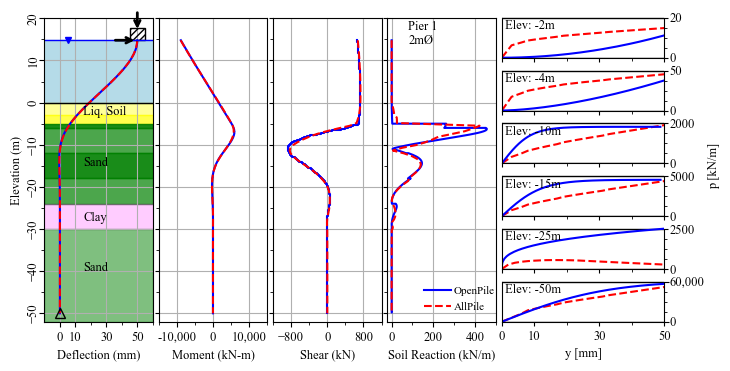

In [6]:
# Set the font globally to Times New Roman
rcParams['font.family'] = 'Times New Roman'

# Set global font size
rcParams['font.size'] = 9

# Get the current working directory
cwd = os.getcwd()

# File paths
file_paths = {
    "deflection_op": "data-figures/pier1-seismic-deflection-openpile.txt",
    "moment_op": "data-figures/pier1-seismic-force-openpile.txt",
    "shear_op": "data-figures/pier1-seismic-force-openpile.txt",
    "pyMob_op": "data-figures/pier1-seismic-pymob-openpile.txt",
    "alp": "data-figures/pier1-seismic-allpile.txt",
    "py_alp": "data-figures/pier1-seismic-py-allpile.txt",
    "py_op": "data-figures/pier1-seismic-py-openpile.txt",
}

# Load data for the first 4 plots
data_def_op = pd.read_csv(os.path.join(cwd, file_paths["deflection_op"]), header=0)
data_mom_op = pd.read_csv(os.path.join(cwd, file_paths["moment_op"]), header=0)
data_shear_op = pd.read_csv(os.path.join(cwd, file_paths["shear_op"]), header=0)
data_pyMob_op = pd.read_csv(os.path.join(cwd, file_paths["pyMob_op"]), header=0)
data_alp = pd.read_csv(os.path.join(cwd, file_paths["alp"]), header=0)

# Load data for the 5th plot
columns = [
    "p[kN/m]@2m", "y[m]@2m",
    "p[kN/m]@4m", "y[m]@4m",
    "p[kN/m]@10m", "y[m]@10m",
    "p[kN/m]@15m", "y[m]@15m",
    "p[kN/m]@25m", "y[m]@25m",
    "p[kN/m]@50m", "y[m]@50m"
]
df_alp = pd.read_csv(os.path.join(cwd, file_paths["py_alp"]), header=0, names=columns)
df_op = pd.read_csv(os.path.join(cwd, file_paths["py_op"]), header=0, names=columns)

# List of depths for the 5th plot
depths = [2, 4, 10, 15, 25, 50]

# Use gridspec for 4 main columns and a separate gridspec for the 5th column with 6 rows
fig = plt.figure(figsize=(8, 4))
outer_gs = gridspec.GridSpec(1, 5, width_ratios=[1, 1, 1, 1, 1.5], wspace=0.05)
gs_5th_col = gridspec.GridSpecFromSubplotSpec(6, 1, subplot_spec=outer_gs[4], hspace=0.2)

# First 4 plots
axs = [fig.add_subplot(outer_gs[0, i]) for i in range(4)]

# Deflection vs Elevation (Plot 1)
axs[0].plot(data_def_op['Deflection [m]'] * 1000, data_def_op['Elevation [m]'], linestyle='-', color='blue')
axs[0].plot(data_alp['Deflection [cm]'] * 1000, data_alp['Elevation [m]'], linestyle='--', color='red')
axs[0].set_xlabel("Deflection (mm)")
axs[0].set_ylabel("Elevation (m)")
axs[0].grid(True)

axs[0].set_xticks([0, 10, 30, 50])
axs[0].set_xlim(-10,60)
axs[0].set_ylim(-52,20)
axs[0].tick_params(axis='x', which='minor')
axs[0].xaxis.set_minor_locator(AutoMinorLocator(1))  # 5 minor ticks per major tick
axs[0].tick_params(axis='y', which='minor')
axs[0].yaxis.set_minor_locator(AutoMinorLocator(2))  # 5 minor ticks per major tick
axs[0].tick_params(axis='y', which='major', labelrotation=90, pad=0)  # Rotate x-axis labels vertically
for label in axs[0].get_yticklabels():
    label.set_verticalalignment('center')

rect_fix = patches.Rectangle(
    xy=(45, 14.8),                  # Bottom-left corner of the rectangle
    width=10, # Maximum extent of the x-axis
    height=3,                # Height from 0 to 14.8 on the y-axis
    facecolor='none',          # Light blue color
    edgecolor='black',
    hatch='/////',
    zorder=2                    # Put the rectangle behind other plot elements
)
axs[0].add_patch(rect_fix)

# Add a light blue rectangular highlight
rect_water = patches.Rectangle(
    xy=(-10, 0),                  # Bottom-left corner of the rectangle
    width=axs[0].get_xlim()[1]+10, # Maximum extent of the x-axis
    height=14.8,                # Height from 0 to 14.8 on the y-axis
    color='lightblue',          # Light blue color
    alpha=0.9,                  # Transparency (optional)
    zorder=0                    # Put the rectangle behind other plot elements
)
axs[0].add_patch(rect_water)

rect_liqsand1 = patches.Rectangle(
    xy=(-10, 0),                 
    width=axs[0].get_xlim()[1]+10, 
    height=-3,               
    color='yellow',          
    alpha=0.4,                 
    zorder=0 
)                  
axs[0].add_patch(rect_liqsand1)

rect_liqsand2 = patches.Rectangle(
    xy=(-10, -3),                  
    width=axs[0].get_xlim()[1]+10, 
    height=-2,               
    color='yellow',          
    alpha=0.7,               
    zorder=0                    
)
axs[0].add_patch(rect_liqsand2)

rect_sand1 = patches.Rectangle(
    xy=(-10, -5),                  
    width=axs[0].get_xlim()[1]+10, 
    height=-1,               
    color='green',          
    alpha=0.9,               
    zorder=0                    
)
axs[0].add_patch(rect_sand1)

rect_sand2 = patches.Rectangle(
    xy=(-10, -6),                  
    width=axs[0].get_xlim()[1]+10, 
    height=-6,               
    color='green',          
    alpha=0.7,               
    zorder=0                    
)
axs[0].add_patch(rect_sand2)

rect_sand3 = patches.Rectangle(
    xy=(-10, -12),                  
    width=axs[0].get_xlim()[1]+10, 
    height=-6,               
    color='green',          
    alpha=0.9,               
    zorder=0                    
)
axs[0].add_patch(rect_sand3)

rect_sand4 = patches.Rectangle(
    xy=(-10, -18),                  
    width=axs[0].get_xlim()[1]+10, 
    height=-6,               
    color='green',          
    alpha=0.7,               
    zorder=0                    
)
axs[0].add_patch(rect_sand4)

rect_clay = patches.Rectangle(
    xy=(-10, -24),                  
    width=axs[0].get_xlim()[1]+10, 
    height=-6,               
    color='magenta',          
    alpha=0.2,               
    zorder=0                    
)
axs[0].add_patch(rect_clay)

rect_sand5 = patches.Rectangle(
    xy=(-10, -30),                  
    width=axs[0].get_xlim()[1]+10, 
    height=-22,               
    color='green',          
    alpha=0.5,               
    zorder=0                    
)
axs[0].add_patch(rect_sand5)

# Example for adding an annotation with an arrow in axs[0]
axs[0].annotate(
    "",            # Annotation text
    xy=(50, 14.8),                   # Point to annotate (x, y)
    xytext=(34, 14.8),              # Text position (x, y)
    arrowprops=dict(
        arrowstyle="->",          # Arrow style (simple arrow)
        color="black",            # Arrow color
        lw=2                      # Line width of the arrow
    ),
    fontsize=10,                  # Font size of the annotation text
    color="blue"                  # Text color
)

axs[0].annotate(
    "",            # Annotation text
    xy=(50, 14.8+2),                   # Point to annotate (x, y)
    xytext=(50, 22),              # Text position (x, y)
    arrowprops=dict(
        arrowstyle="->",          # Arrow style (simple arrow)
        color="black",            # Arrow color
        lw=2                      # Line width of the arrow
    ),
    fontsize=10,                  # Font size of the annotation text
    color="blue"                  # Text color
)

axs[0].plot(
    5, 14.8,                         # Coordinates of the point (x, y)
    marker="v",                    # Use "^" for an upward-pointing triangle
    markersize=5,                 # Size of the marker
    color="blue",                  # Color of the marker
)

axs[0].axhline(
    y=14.8,                      # y-coordinate of the horizontal line
    color="blue",             # Line color
    linestyle="-",           # Line style (e.g., dashed line)
    linewidth=1              # Line width
)

axs[0].axhline(
    y=0.0,                      # y-coordinate of the horizontal line
    color="black",             # Line color
    linestyle="-",           # Line style (e.g., dashed line)
    linewidth=1              # Line width
)

axs[0].plot(
    0, -50,                         # Coordinates of the point (x, y)
    marker="^",                    # Use "^" for an upward-pointing triangle
    markersize=7,                 # Size of the marker
    color="black",                  # Color of the marker
    markerfacecolor='none'          # Hollow fill for the marker
)

axs[0].text(15, -3, "Liq. Soil", fontsize=9, color="black")
axs[0].text(15, -15, "Sand", fontsize=9, color="black")
axs[0].text(15, -28, "Clay", fontsize=9, color="black")
axs[0].text(15, -40, "Sand", fontsize=9, color="black")

pos = axs[0].get_position()
axs[0].set_position([pos.x0, pos.y0, pos.width, pos.height*0.985])

# Moment vs Elevation (Plot 2)
axs[1].plot(data_mom_op['M [kNm]'] * -1, data_mom_op['Elevation [m]'], linestyle='-', color='blue')
axs[1].plot(data_alp['Moment [kN-m]'], data_alp['Elevation [m]'], linestyle='--', color='red')
axs[1].set_xlabel("Moment (kN-m)")
axs[1].grid(True)
axs[1].set_yticklabels([])
axs[1].tick_params(axis='y', length=0)

# Set custom y-ticks and grid lines
axs[1].set_xticks([-10000, 0, 10000])  # Set y-tick positions
axs[1].set_xlim(-15000.5,15000.5)
axs[1].set_ylim(-52,20)
axs[1].grid(True, which='major', axis='x')  # Enable vertical grid lin
axs[1].tick_params(axis='x', which='minor')
axs[1].xaxis.set_minor_locator(AutoMinorLocator(2))  # 5 minor ticks per major tick
axs[1].tick_params(axis='y', which='major', length=3)
axs[1].yaxis.set_minor_locator(AutoMinorLocator(2))  # 5 minor ticks per major tick
axs[1].xaxis.set_major_formatter(FuncFormatter(comma_formatter))

pos = axs[1].get_position()
axs[1].set_position([pos.x0, pos.y0, pos.width, pos.height*0.985])

# Shear vs Elevation (Plot 3)
axs[2].plot(data_shear_op['V [kN]'], data_shear_op['Elevation [m]'], linestyle='-', color='blue')
axs[2].plot(data_alp['Shear [kN]'], data_alp['Elevation [m]'], linestyle='--', color='red')
axs[2].set_xlabel("Shear (kN)")
axs[2].grid(True)
axs[2].set_yticklabels([])
axs[2].tick_params(axis='y', length=0)

axs[2].set_xticks([-800, 0, 800])  # Set y-tick positions
axs[2].set_xlim(-1200.1,1200.1)
axs[2].set_ylim(-52,20)
axs[2].grid(True, which='major', axis='x')  # Enable vertical grid lin
axs[2].tick_params(axis='x', which='minor')
axs[2].xaxis.set_minor_locator(AutoMinorLocator(2))  # 5 minor ticks per major tick
axs[2].tick_params(axis='y', which='major', length=3)
axs[2].yaxis.set_minor_locator(AutoMinorLocator(2))  # 5 minor ticks per major tick

pos = axs[2].get_position()
axs[2].set_position([pos.x0, pos.y0, pos.width, pos.height*0.985])

# pyMob vs Elevation (Plot 4)
axs[3].plot(data_pyMob_op['p_mobilized [kN/m]'], data_pyMob_op['Elevation [m]'], linestyle='-', color='blue', label='OpenPile')
axs[3].plot(data_alp['Soil Reaction [kN/m]'].abs(), data_alp['Elevation [m]'], linestyle='--', color='red', label='AllPile')
axs[3].set_xlabel("Soil Reaction (kN/m)")
axs[3].grid(True)
axs[3].set_yticklabels([])
axs[3].tick_params(axis='y', length=0)
axs[3].set_xticks([0, 200, 400])
axs[3].set_xlim(-60, 560)

axs[3].set_xlim(-20,500)
axs[3].set_ylim(-52,20)
axs[3].grid(True, which='major', axis='x')  # Enable vertical grid lin
axs[3].tick_params(axis='x', which='minor')
axs[3].xaxis.set_minor_locator(AutoMinorLocator(2))  # 5 minor ticks per major tick
axs[3].tick_params(axis='y', which='major', length=3)
axs[3].yaxis.set_minor_locator(AutoMinorLocator(2))  # 5 minor ticks per major tick

axs[3].legend(
    loc="lower right",            # Position of the legend
     bbox_to_anchor=(1.08, 0),   # (x, y) position relative to the axes
    handlelength=2.5,              # Length of the legend symbol (default is 2.0)
    handletextpad=0.2,           # Space between symbol and text (default is 0.8)
    fontsize=8,                  # Font size of the legend text
    frameon=False                # Remove the legend box
)

pos = axs[3].get_position()
axs[3].set_position([pos.x0, pos.y0, pos.width, pos.height*0.985])

y_tickMax = [20, 50, 2000, 5000, 2500, 60000 ]

# 6 rows for the 5th column
for i, depth in enumerate(depths):
    ax = fig.add_subplot(gs_5th_col[i])
    p_alp = df_alp[f"p[kN/m]@{depth}m"]
    y_alp = df_alp[f"y[m]@{depth}m"] * 1000
    p_op = df_op[f"p[kN/m]@{depth}m"]
    y_op = df_op[f"y[m]@{depth}m"] * 1000

    # Plot p-y curves
    ax.plot(y_alp, p_alp, linestyle='--', color="red", label="AllPile")
    ax.plot(y_op, p_op, linestyle='-', color="blue", label="OpenPile")
    ax.set_ylabel("p [kN/m]")
    ax.grid(True)
    ax.text(0.02, 0.65, f"Elev: -{depth}m", color="black", transform=ax.transAxes)
    ax.set_xlim(0, 50)
    ax.set_ylim(0, y_tickMax[i]*1.1)

    # Set custom y-axis limits for depth=2m
    if depth == 2:
        ax.set_ylim(0, 20)
    
    # Suppress individual y-axis labels for subplots
    ax.set_ylabel("")
    ax.yaxis.set_ticks_position('right')
    ax.yaxis.set_label_position('right')
    ax.set_xticks([0, 10, 30, 50])  # Set y-tick positions
    ax.grid(True, which='major', axis='x')  # Enable vertical grid lin
    ax.set_xlim(0, 50)
    ax.set_ylim(0, y_tickMax[i]*1.1) #???
    # ax.set_xticklabels([])

    # Apply custom formatter to y-axis
    ax.yaxis.set_major_formatter(FuncFormatter(comma_formatter))
    y_ticks = ax.get_yticks()
    # Suppress only x-axis tick marks
    ax.tick_params(axis='x', length=0)
    ax.tick_params(axis='y', pad=0.5)
    ax.set_xticks([0, 10, 30, 50])  # Set x-tick positions
    ax.yaxis.set_minor_locator(AutoMinorLocator(4))  # 5 minor ticks per major tick
    ax.grid(axis='y', color='black', linestyle='-', linewidth=1)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_bounds(0, y_tickMax[i])  # Set the spine to range from 10 to 30
    ax.spines['right'].set_bounds(0, y_tickMax[i])  # Set the spine to range from 10 to 30
    ax.grid(axis='x', visible=False)


    # Conditionally set x-ticks and x-tick labels for the last subplot
    if i == len(depths) - 1:  # Last row (6th row)
        ax.set_xticklabels([0, 10, 30, 50])  # Set x-tick labels
        ax.set_yticks([0, 60000])  # Specify positions for tick marks
        ax.tick_params(axis='x', which='major', length=3)
        ax.set_xlabel("y [mm]")  # Add x-axis label
        ax.tick_params(axis='x', which='minor')
        ax.xaxis.set_minor_locator(AutoMinorLocator(1))  # 5 minor ticks per major tick
    else:
        ax.set_xticks([0, 10, 30, 50])  # Specify positions for tick marks
        ax.tick_params(axis='both', which='major', length=3)  # Major ticks
        ax.set_xticklabels([])  # Set x-tick labels
        # ax.set_xticklabels([0, 10, 30, 50])  # Set x-tick labels
        ax.tick_params(axis='x', which='minor')
        ax.xaxis.set_minor_locator(AutoMinorLocator(1))  # 5 minor ticks per major tick

# Set x-axis label for the last subplot in the 5th column

fig.text(0.955, 0.5, "p [kN/m]", fontsize=9, va="center", rotation="vertical")
fig.text(0.58, 0.83, "Pier 1\n2mØ", fontsize=9, va="center", )

# Adjust layout
plt.tight_layout(pad=0.2)
plt.show()

fig.savefig("figures/fig3a.svg", format="svg", bbox_inches="tight")
fig.savefig("figures/fig3a.pdf", format="pdf", bbox_inches="tight")
fig.savefig("figures/fig3a.png", format="png", bbox_inches="tight", dpi=1000)



### Figure 3 (b) Pier 3 force profiles and developed p-y curves between AllPile and OpenPile

C:\Users\AMH-L143\AppData\Local\Temp\ipykernel_27156\2508840089.py:363: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.2)


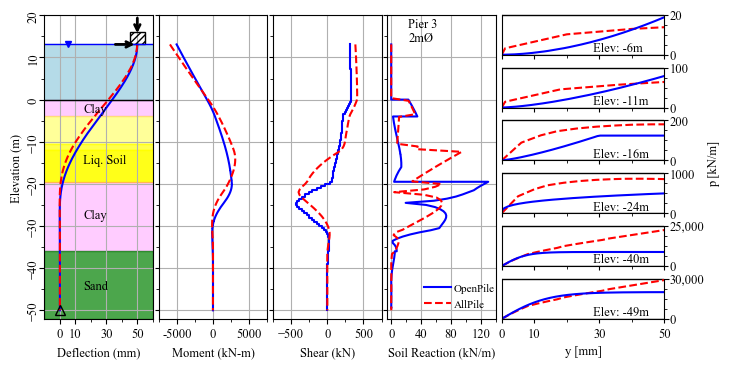

In [7]:
# Set the font globally to Times New Roman
rcParams['font.family'] = 'Times New Roman'

# Set global font size
rcParams['font.size'] = 9

# Get the current working directory
cwd = os.getcwd()

# File paths
file_paths = {
    "deflection_op": "data-figures/pier3-seismic-deflection-openpile.txt",
    "moment_op": "data-figures/pier3-seismic-force-openpile.txt",
    "shear_op": "data-figures/pier3-seismic-force-openpile.txt",
    "pyMob_op": "data-figures/pier3-seismic-pymob-openpile.txt",
    "alp": "data-figures/pier3-seismic-allpile.txt",
    "py_alp": "data-figures/pier3-seismic-py-allpile.txt",
    "py_op": "data-figures/pier3-seismic-py-openpile.txt",
}

# Load data for the first 4 plots
data_def_op = pd.read_csv(os.path.join(cwd, file_paths["deflection_op"]), header=0)
data_mom_op = pd.read_csv(os.path.join(cwd, file_paths["moment_op"]), header=0)
data_shear_op = pd.read_csv(os.path.join(cwd, file_paths["shear_op"]), header=0)
data_pyMob_op = pd.read_csv(os.path.join(cwd, file_paths["pyMob_op"]), header=0)
data_alp = pd.read_csv(os.path.join(cwd, file_paths["alp"]), header=0)

# Load data for the 5th plot
columns = [
    "p[kN/m]@6m", "y[m]@6m",
    "p[kN/m]@11m", "y[m]@11m",
    "p[kN/m]@16m", "y[m]@16m",
    "p[kN/m]@24m", "y[m]@24m",
    "p[kN/m]@40m", "y[m]@40m",
    "p[kN/m]@49m", "y[m]@49m"
]
df_alp = pd.read_csv(os.path.join(cwd, file_paths["py_alp"]), header=0, names=columns)
df_op = pd.read_csv(os.path.join(cwd, file_paths["py_op"]), header=0, names=columns)

# List of depths for the 5th plot
depths = [6, 11, 16, 24, 40, 49]

# Use gridspec for 4 main columns and a separate gridspec for the 5th column with 6 rows
fig = plt.figure(figsize=(8, 4))
outer_gs = gridspec.GridSpec(1, 5, width_ratios=[1, 1, 1, 1, 1.5], wspace=0.05)
gs_5th_col = gridspec.GridSpecFromSubplotSpec(6, 1, subplot_spec=outer_gs[4], hspace=0.2)

# First 4 plots
axs = [fig.add_subplot(outer_gs[0, i]) for i in range(4)]

# Deflection vs Elevation (Plot 1)
axs[0].plot(data_def_op['Deflection [m]'] * 1000, data_def_op['Elevation [m]'], linestyle='-', color='blue', label='OpenPile')
axs[0].plot(data_alp['Deflection [cm]'] * 1000, data_alp['Elevation [m]'], linestyle='--', color='red', label='AllPile')
axs[0].set_xlabel("Deflection (mm)")
axs[0].set_ylabel("Elevation (m)")
axs[0].grid(True)
# Adjust legend

axs[0].set_xticks([0, 10, 30, 50])
axs[0].set_xlim(-10,60)
axs[0].set_ylim(-52,20)
axs[0].tick_params(axis='x', which='minor')
axs[0].xaxis.set_minor_locator(AutoMinorLocator(1))  # 5 minor ticks per major tick
axs[0].tick_params(axis='y', which='minor')
axs[0].yaxis.set_minor_locator(AutoMinorLocator(2))  # 5 minor ticks per major tick
axs[0].tick_params(axis='y', which='major', labelrotation=90, pad=0)  # Rotate x-axis labels vertically
for label in axs[0].get_yticklabels():
    label.set_verticalalignment('center')

rect_fix = patches.Rectangle(
    xy=(45, 13.1),                  # Bottom-left corner of the rectangle
    width=10, # Maximum extent of the x-axis
    height=3,                # Height from 0 to 14.8 on the y-axis
    facecolor='none',          # Light blue color
    edgecolor='black',
    hatch='/////',
    zorder=2                    # Put the rectangle behind other plot elements
)
axs[0].add_patch(rect_fix)

# Add a light blue rectangular highlight
rect_water = patches.Rectangle(
    xy=(-10, 0),                  # Bottom-left corner of the rectangle
    width=axs[0].get_xlim()[1]+10, # Maximum extent of the x-axis
    height=13.1,                # Height from 0 to 14.8 on the y-axis
    color='lightblue',          # Light blue color
    alpha=0.9,                  # Transparency (optional)
    zorder=0                    # Put the rectangle behind other plot elements
)
axs[0].add_patch(rect_water)

rect_clay1 = patches.Rectangle(
    xy=(-10, 0),                 
    width=axs[0].get_xlim()[1]+10, 
    height=-4,               
    color='magenta',          
    alpha=0.2,                 
    zorder=0 
)                  
axs[0].add_patch(rect_clay1)

rect_liqclay1 = patches.Rectangle(
    xy=(-10, -4),                  
    width=axs[0].get_xlim()[1]+10, 
    height=-6.5,               
    color='yellow',          
    alpha=0.4,               
    zorder=0                    
)
axs[0].add_patch(rect_liqclay1)

rect_liqclay2 = patches.Rectangle(
    xy=(-10, -10.5),                  
    width=axs[0].get_xlim()[1]+10, 
    height=-1.5,               
    color='yellow',          
    alpha=0.7,               
    zorder=0                    
)
axs[0].add_patch(rect_liqclay2)

rect_liqclay3 = patches.Rectangle(
    xy=(-10, -12),                  
    width=axs[0].get_xlim()[1]+10, 
    height=-7.5,               
    color='yellow',          
    alpha=0.9,               
    zorder=0                    
)
axs[0].add_patch(rect_liqclay3)

rect_clay1 = patches.Rectangle(
    xy=(-10, -19.5),                 
    width=axs[0].get_xlim()[1]+10, 
    height=-16.5,               
    color='magenta',          
    alpha=0.2,                 
    zorder=0 
)  

axs[0].add_patch(rect_clay1)

rect_sand1 = patches.Rectangle(
    xy=(-10, -36),                  
    width=axs[0].get_xlim()[1]+10, 
    height=-16,               
    color='green',          
    alpha=0.7,               
    zorder=0                    
)
axs[0].add_patch(rect_sand1)

# Example for adding an annotation with an arrow in axs[0]
axs[0].annotate(
    "",            # Annotation text
    xy=(50, 13.1),                   # Point to annotate (x, y)
    xytext=(34, 13.1),              # Text position (x, y)
    arrowprops=dict(
        arrowstyle="->",          # Arrow style (simple arrow)
        color="black",            # Arrow color
        lw=2                      # Line width of the arrow
    ),
    fontsize=10,                  # Font size of the annotation text
    color="blue"                  # Text color
)

axs[0].annotate(
    "",            # Annotation text
    xy=(50, 13.1+2),                   # Point to annotate (x, y)
    xytext=(50, 20),              # Text position (x, y)
    arrowprops=dict(
        arrowstyle="->",          # Arrow style (simple arrow)
        color="black",            # Arrow color
        lw=2                      # Line width of the arrow
    ),
    fontsize=10,                  # Font size of the annotation text
    color="blue"                  # Text color
)

axs[0].plot(
    5, 13.1,                         # Coordinates of the point (x, y)
    marker="v",                    # Use "^" for an upward-pointing triangle
    markersize=5,                 # Size of the marker
    color="blue",                  # Color of the marker
)

axs[0].axhline(
    y=13.1,                      # y-coordinate of the horizontal line
    color="blue",             # Line color
    linestyle="-",           # Line style (e.g., dashed line)
    linewidth=1              # Line width
)

axs[0].axhline(
    y=0.0,                      # y-coordinate of the horizontal line
    color="black",             # Line color
    linestyle="-",           # Line style (e.g., dashed line)
    linewidth=1              # Line width
)

axs[0].plot(
    0, -50,                         # Coordinates of the point (x, y)
    marker="^",                    # Use "^" for an upward-pointing triangle
    markersize=7,                 # Size of the marker
    color="black",                  # Color of the marker
    markerfacecolor='none'          # Hollow fill for the marker
)

axs[0].text(15, -3, "Clay", fontsize=9, color="black")
axs[0].text(15, -15, "Liq. Soil", fontsize=9, color="black")
axs[0].text(15, -28, "Clay", fontsize=9, color="black")
axs[0].text(15, -45, "Sand", fontsize=9, color="black")

pos = axs[0].get_position()
axs[0].set_position([pos.x0, pos.y0, pos.width, pos.height*0.985])

# Moment vs Elevation (Plot 2)
axs[1].plot(data_mom_op['M [kNm]'] * -1, data_mom_op['Elevation [m]'], linestyle='-', color='blue')
axs[1].plot(data_alp['Moment [kN-m]'], data_alp['Elevation [m]'], linestyle='--', color='red')
axs[1].set_xlabel("Moment (kN-m)")
axs[1].grid(True)
axs[1].set_yticklabels([])
axs[1].tick_params(axis='y', length=0)

# Set custom y-ticks and grid lines
axs[1].set_xticks([-5000, 0, 5000])  # Set y-tick positions
axs[1].set_xlim(-7500.5,7500.5)
axs[1].set_ylim(-52,20)
axs[1].grid(True, which='major', axis='x')  # Enable vertical grid lin
axs[1].tick_params(axis='x', which='minor')
axs[1].xaxis.set_minor_locator(AutoMinorLocator(2))  # 5 minor ticks per major tick
axs[1].tick_params(axis='y', which='major', length=3)
axs[1].yaxis.set_minor_locator(AutoMinorLocator(2))  # 5 minor ticks per major tick
axs[1].xaxis.set_major_formatter(FuncFormatter(comma_formatter))

pos = axs[1].get_position()
axs[1].set_position([pos.x0, pos.y0, pos.width, pos.height*0.985])

# Shear vs Elevation (Plot 3)
axs[2].plot(data_shear_op['V [kN]'], data_shear_op['Elevation [m]'], linestyle='-', color='blue')
axs[2].plot(data_alp['Shear [kN]'], data_alp['Elevation [m]'], linestyle='--', color='red')
axs[2].set_xlabel("Shear (kN)")
axs[2].grid(True)
axs[2].set_yticklabels([])
axs[2].tick_params(axis='y', length=0)

axs[2].set_xticks([-500, 0, 500])  # Set y-tick positions
axs[2].set_xlim(-750.1,750.1)
axs[2].set_ylim(-52,20)
axs[2].grid(True, which='major', axis='x')  # Enable vertical grid lin
axs[2].tick_params(axis='x', which='minor')
axs[2].xaxis.set_minor_locator(AutoMinorLocator(2))  # 5 minor ticks per major tick
axs[2].tick_params(axis='y', which='major', length=3)
axs[2].yaxis.set_minor_locator(AutoMinorLocator(2))  # 5 minor ticks per major tick

pos = axs[2].get_position()
axs[2].set_position([pos.x0, pos.y0, pos.width, pos.height*0.985])

# pyMob vs Elevation (Plot 4)
axs[3].plot(data_pyMob_op['p_mobilized [kN/m]'], data_pyMob_op['Elevation [m]'], linestyle='-', color='blue', label='OpenPile')
axs[3].plot(data_alp['Soil Reaction [kN/m]'].abs(), data_alp['Elevation [m]'], linestyle='--', color='red', label='AllPile')
axs[3].set_xlabel("Soil Reaction (kN/m)")
axs[3].grid(True)
axs[3].set_yticklabels([])
axs[3].tick_params(axis='y', length=0)
axs[3].set_xticks([0, 40, 80, 120])  # Set y-tick positions
axs[3].grid(True, which='major', axis='x')  # Enable vertical grid lin

axs[3].set_xlim(-5,140)
axs[3].set_ylim(-52,20)
axs[3].grid(True, which='major', axis='x')  # Enable vertical grid lin
axs[3].tick_params(axis='x', which='minor')
axs[3].xaxis.set_minor_locator(AutoMinorLocator(2))  # 5 minor ticks per major tick
axs[3].tick_params(axis='y', which='major', length=3)
axs[3].yaxis.set_minor_locator(AutoMinorLocator(2))  # 5 minor ticks per major tick

axs[3].legend(
    loc="lower right",            # Position of the legend
     bbox_to_anchor=(1.08, 0),   # (x, y) position relative to the axes
    handlelength=2.5,              # Length of the legend symbol (default is 2.0)
    handletextpad=0.2,           # Space between symbol and text (default is 0.8)
    fontsize=8,                  # Font size of the legend text
    frameon=False                # Remove the legend box
)

pos = axs[3].get_position()
axs[3].set_position([pos.x0, pos.y0, pos.width, pos.height*0.985])


y_tickMax = [20, 100, 200, 1000, 25000, 30000 ]

# 6 rows for the 5th column
for i, depth in enumerate(depths):
    ax = fig.add_subplot(gs_5th_col[i])
    p_alp = df_alp[f"p[kN/m]@{depth}m"]
    y_alp = df_alp[f"y[m]@{depth}m"] * 1000
    p_op = df_op[f"p[kN/m]@{depth}m"]
    y_op = df_op[f"y[m]@{depth}m"] * 1000

    # Plot p-y curves
    ax.plot(y_alp, p_alp, linestyle='--', color="red", label="AllPile")
    ax.plot(y_op, p_op, linestyle='-', color="blue", label="OpenPile")
    ax.set_ylabel("p [kN/m]")
    ax.grid(True)
    ax.text(0.56, 0.08, f"Elev: -{depth}m", color="black", transform=ax.transAxes)
    ax.set_xlim(0, 50)
    # print(y_tickMax[i])
    ax.set_ylim(0, y_tickMax[i]*1.1)

    # Set custom y-axis limits for depth=2m
    if depth == 6:
        ax.set_ylim(0, 20)
    
    # Suppress individual y-axis labels for subplots
    ax.set_ylabel("")
    ax.yaxis.set_ticks_position('right')
    ax.yaxis.set_label_position('right')
    ax.set_xticks([0, 10, 30, 50])  # Set y-tick positions
    ax.grid(True, which='major', axis='x')  # Enable vertical grid lin
    ax.set_xlim(0, 50)
    ax.set_ylim(0, y_tickMax[i]*1.1)
    # ax.set_xticklabels([])

    # Apply custom formatter to y-axis
    ax.yaxis.set_major_formatter(FuncFormatter(comma_formatter))
    y_ticks = ax.get_yticks()
    # print(f"y_ticks: {y_ticks}")
    # Suppress only x-axis tick marks
    ax.tick_params(axis='x', length=0)
    ax.tick_params(axis='y', pad=0.5)
    ax.set_xticks([0, 10, 30, 50])  # Set x-tick positions
    # ax.minorticks_on()
    # ax.yaxis.minorticks_on()
    # Enable minor ticks for only the y-axis
    ax.yaxis.set_minor_locator(AutoMinorLocator(4))  # 5 minor ticks per major tick
    ax.grid(axis='y', color='black', linestyle='-', linewidth=1)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_bounds(0, y_tickMax[i])  # Set the spine to range from 10 to 30
    ax.spines['right'].set_bounds(0, y_tickMax[i])  # Set the spine to range from 10 to 30
    ax.grid(axis='x', visible=False)

    # Conditionally set x-ticks and x-tick labels for the last subplot
    if i == len(depths) - 1:  # Last row (6th row)
        ax.set_xticklabels([0, 10, 30, 50])  # Set x-tick labels
        ax.set_yticks([0, 30000])  # Specify positions for tick marks
        ax.tick_params(axis='x', which='major', length=3)
        ax.set_xlabel("y [mm]")  # Add x-axis label
        ax.tick_params(axis='x', which='minor')
        ax.xaxis.set_minor_locator(AutoMinorLocator(1))  # 5 minor ticks per major tick
    else:
        ax.set_xticks([0, 10, 30, 50])  # Specify positions for tick marks
        ax.tick_params(axis='both', which='major', length=3)  # Major ticks
        ax.set_xticklabels([])  # Set x-tick labels
        # ax.set_xticklabels([0, 10, 30, 50])  # Set x-tick labels
        ax.tick_params(axis='x', which='minor')
        ax.xaxis.set_minor_locator(AutoMinorLocator(1))  # 5 minor ticks per major tick
 
# Add a shared y-axis label for the entire column
fig.text(0.955, 0.5, "p [kN/m]", fontsize=9, va="center", rotation="vertical")
fig.text(0.58, 0.83, "Pier 3\n2mØ", fontsize=9, va="center", )

# Adjust layout
plt.tight_layout(pad=0.2)
plt.show()

fig.savefig("figures/fig3b.svg", format="svg", bbox_inches="tight")
fig.savefig("figures/fig3b.pdf", format="pdf", bbox_inches="tight")
fig.savefig("figures/fig3b.png", format="png", bbox_inches="tight", dpi=1000)